In [1]:
import xarray as xr
import numpy as np

In [2]:
#path = "/perm/itas/db/deepMIP/Herold_etal_2014"
path = "/Users/asozza/Downloads/gmd-7-2077-2014-supplement/Supp"

In [3]:
file_path = f"{path}/herold_etal_eocene_topo_1x1.nc"
data = xr.open_dataset(file_path)

In [4]:
data

<xarray.Dataset> Size: 261kB
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Data variables:
    topo     (lat, lon) float32 259kB ...
Attributes:
    title:    Eocene topography and bathymetry
    desc:     Derived predominantly from the early Eocene topography of Markw...

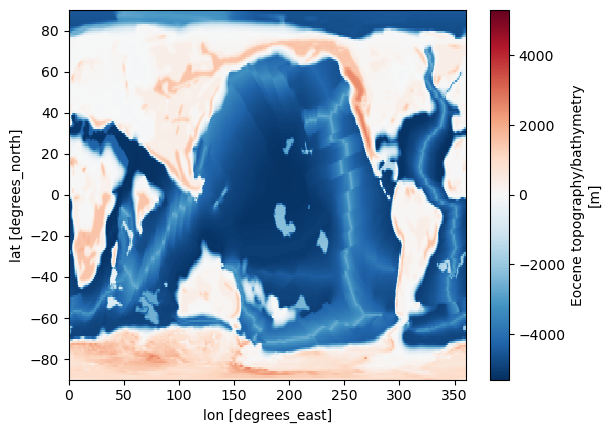

In [5]:
data['topo'].plot()

In [ ]:
# create land-sea mask
data['land_sea_mask'] = (data['topo'] > 0).astype(int)

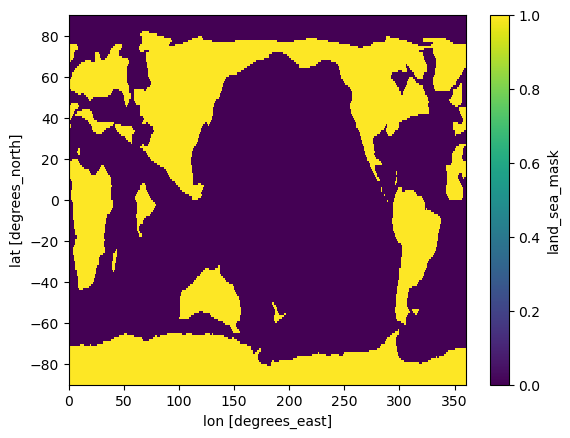

In [7]:
data['land_sea_mask'].plot()

In [16]:
# mask_opensea
data['mask_opensea'] = (data['topo'] < 0).astype(int)

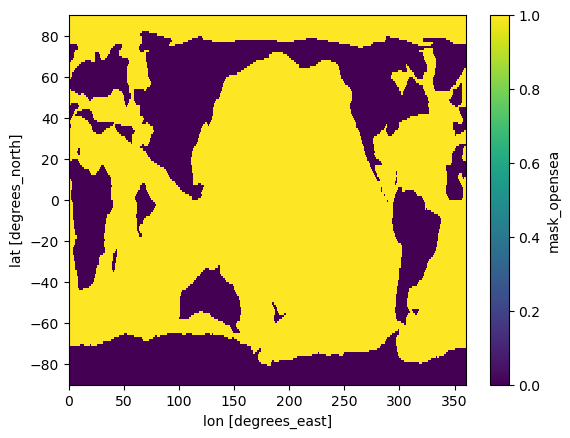

In [17]:
data['mask_opensea'].plot()

In [12]:
# bathymetry 
data['bathymetry'] = data['topo'].where(data['topo'] < 0, 0)
data['bathymetry'] = -data['bathymetry']

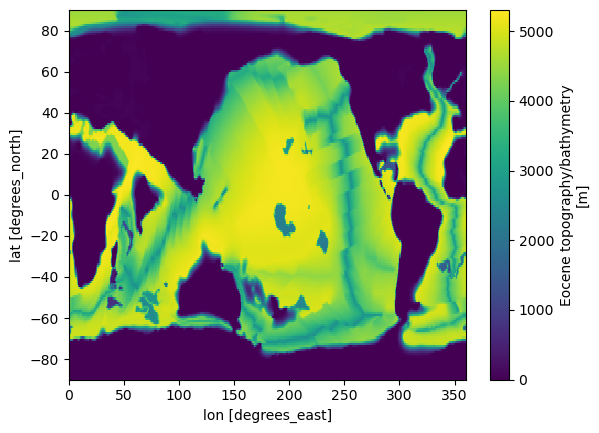

In [13]:
data['bathymetry'].plot()

In [10]:
# create orography
data['orography'] = data['topo'].where(data['topo'] > 0, 0)

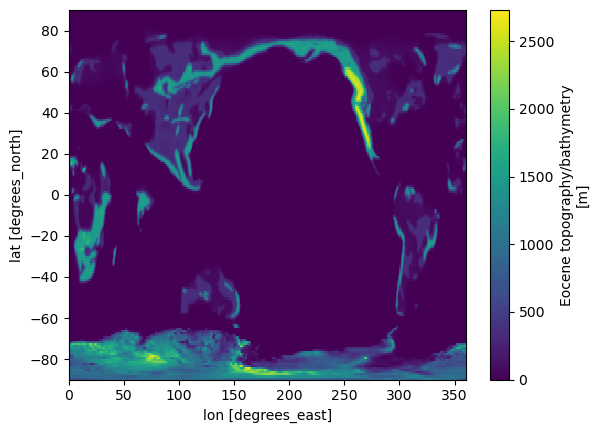

In [11]:
data['orography'].plot()

In [18]:
data

<xarray.Dataset> Size: 2MB
Dimensions:        (lat: 180, lon: 360)
Coordinates:
  * lat            (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon            (lon) float32 1kB 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
Data variables:
    topo           (lat, lon) float32 259kB 685.8 675.2 ... -4.528e+03
    land_sea_mask  (lat, lon) int64 518kB 1 1 1 1 1 1 1 1 1 ... 0 0 0 0 0 0 0 0
    bathymetry     (lat, lon) float32 259kB -0.0 -0.0 ... 4.529e+03 4.528e+03
    orography      (lat, lon) float32 259kB 685.8 675.2 667.2 ... 0.0 0.0 0.0
    ocean_mask     (lat, lon) int64 518kB 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1
    mask_opensea   (lat, lon) int64 518kB 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1
Attributes:
    title:    Eocene topography and bathymetry
    desc:     Derived predominantly from the early Eocene topography of Markw...

In [ ]:
# OLD FUNCTIONS

def create_landsea_mask(data, path):
    """
    Create land-sea mask, bathymetry, and orography from the topography data.
    Args:
        data (xarray.Dataset): Topography data.       
    """

    # Create land-sea mask
    data['landsea_mask'] = (data['topo'] > 0).astype(int)

    # Save the results
    data.to_netcdf(os.path.join(path, "landsea_mask.nc"))

def create_opensea_mask(data, path):
    """
    Create open sea mask from the topography data.
    Args:
        data (xarray.Dataset): Topography data.
    """
    # Create open sea mask
    data['mask_opensea'] = (data['topo'] < 0).astype(int)

    # Save the results
    data.to_netcdf(os.path.join(path, "mask_opensea.nc"))

def create_bathymetry(data, path):
    """
    Create bathymetry from the topography data.
    Args:
        data (xarray.Dataset): Topography data.
    """

    # Create bathymetry
    data['bathymetry'] = -data['topo'].where(data['topo'] < 0)

    # save the results
    data.to_netcdf(os.path.join(path, "bathymetry.nc"))

def create_orography(data, path):
    """
    Create orography from the topography data.
    Args:
        data (xarray.Dataset): Topography data.
    """

    # Create orography
    data['orography'] = data['topo'].where(data['topo'] > 0)

    # save the results
    data.to_netcdf(os.path.join(path, "orography.nc"))
